<h1> DRL Robot Navigation with ROS2 - Documentation </h1>
<h4> Written by Mark Wanis & Jaran Mann, Fall 2025 </h4>

<h4> <b> To-do List: </b> </h4>
<ul>
    <li>Low priority: grasp the basics of the Raspberry Pi Camera</li>
    <li>Recreate tutorial for how to start turtle bot and save all of the data into a file</li>
    <li>Learn Gazebo</li>
</ul>

In [ ]:
!pip install pandas
!pip install matplotlib

<h2> <b> Daily Documentation </b> </h2>

<h3> Date: 9/10/25</h3>

<h4> <b> Meeting Overview: </b> </h4>
<p> We need to get comfortable with manipulating both the inputs and outputs of the robot. </p>

<p> <b> Inputs: </b> </p>
<ul>
<li> Lidar </li>
<li> Odometry </li>
    <ul>
        <li>Position </li>
        <li>Velocity </li>
    </ul>
<li> Gyroscope </li>
    <ul>
        <li>Heading</li>
    </ul>
<li> Raspberry Pi Camera (Low priority)</li>
<li> Time </li>
</ul>

<p> <b> Outputs: </b> </p>
<ul>
<li> Linear Velocity </li>
<li> Angular Velocity </li>
</ul>

<h4> <b> Lab Overview: </b> </h4>

<p> Objective: Tell the robot to go to different spots on the ground while recording all of the data. </p>

<h5> <b> How the program manipulates each input and output </b> </h5>
<ul>
    <li>Lidar</li>
    <li>Odometry</li>
    <ul>
        <li>Position </li>
        <li>Velocity </li>
    </ul>
    <li>Gyroscope</li>
    <ul>
        <li>Heading</li>
    </ul>
    <li> Time </li>
    <li> Linear Velocity </li>
    <li> Angular Velocity </li>
</ul>

<h3> Date: 9/17/25</h3>

<h4> <b> Meeting Overview: </b> </h4>

<h5> <b> To-do List </b> </h5>
<ul>
    <li>Grasp the fundamentals (complete)</li>
    <li>Be able to grab the info and timestamps for each of the inputs and outputs (complete)</li>
    <li>Low priority: grasp the basics of the Raspberry Pi</li>
    <li>Test and graph the response time of the robot's change in linear and angular</li>
    <li>Learn about the gazebo environment and document how to do it</li>
</ul>

<h4> <b> Lab Overview: </b> </h4>

<h5> <b> Outline: </b> </h5>
<ul>
    <li>Worked on printing more variables and finding the timestamps</li>
    <li>Created the Point2D and Velocity classes</li>
</ul>

<h3> Date: 9/22/25</h3>

<h4> <b> Lab Overview: </b> </h4>

<h5> <b> Outline: </b> </h5>
<ul>
    <li>Added imu variables, subscriber, and callback function</li>
    <li>Code runs and prints all of the inputs and outputs</li>
    <li>Started testing and graphing the response time of the robot's change in linear and angular</li>
</ul>

<h3> Date: 9/24/25</h3>

<h4> <b> Meeting Overview: </b> </h4>

<h5> <b> To-do List </b> </h5>
<ul>
    <li>Fix velocity odom by looking up others who have had same problem</li>
    <li>Recreate tutorial for how to start turtle bot and save all of the data into a file</li>
    <li>Learn Gazebo</li>
</ul>

<h4> <b> Lab Overview: </b> </h4>
<h5> <b> Outline: </b> </h5>
<ul>
    <li>Researched Gazebo</li>
    <li>Since grabbing velocity from the odometry didn't work, we switched to using encoders</li>
</ul>

<h3> Date: 9/29/25</h3>

<h4> <b> Lab Overview: </b> </h4>
<h5> <b> Outline: </b> </h5>
<ul>
    <li>Finished graphing actual and expected velocities</li>
</ul>

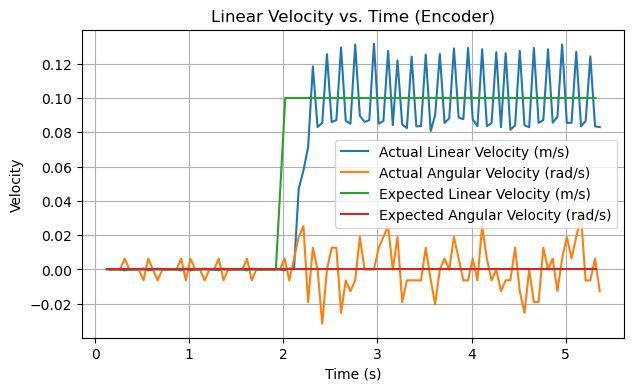

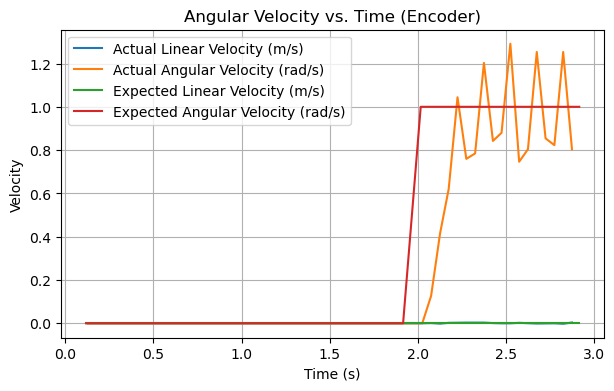

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load File 1
df1 = pd.read_csv("Linear Velocity Readings (Encoder).csv")

# Plot
plt.figure(figsize=(7,4))

plt.plot(df1["Time (s)"], df1["Actual Linear Velocity (m/s)"], label="Actual Linear Velocity (m/s)")
plt.plot(df1["Time (s)"], df1["Actual Angular Velocity (rad/s)"], label="Actual Angular Velocity (rad/s)")
plt.plot(df1["Time (s)"], df1["Expected Linear Velocity (m/s)"], label="Expected Linear Velocity (m/s)")
plt.plot(df1["Time (s)"], df1["Expected Angular Velocity (rad/s)"], label="Expected Angular Velocity (rad/s)")

plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.title("Linear Velocity vs. Time (Encoder)")
plt.legend()
plt.grid(True)
plt.show()

# Load File 2
df2 = pd.read_csv("Angular Velocity Readings (Encoder).csv")

# Plot
plt.figure(figsize=(7,4))

plt.plot(df2["Time (s)"], df2["Actual Linear Velocity (m/s)"], label="Actual Linear Velocity (m/s)")
plt.plot(df2["Time (s)"], df2["Actual Angular Velocity (rad/s)"], label="Actual Angular Velocity (rad/s)")
plt.plot(df2["Time (s)"], df2["Expected Linear Velocity (m/s)"], label="Expected Linear Velocity (m/s)")
plt.plot(df2["Time (s)"], df2["Expected Angular Velocity (rad/s)"], label="Expected Angular Velocity (rad/s)")

plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.title("Angular Velocity vs. Time (Encoder)")
plt.legend()
plt.grid(True)
plt.show()


<h3> Date: 10/1/25</h3>

<h4> <b> Meeting Overview: </b> </h4>
<h5> <b> Outline: </b> </h5>
<ul>
    <li>Mainly went over the inconsistency of the encoder readings</li>
    <li>Weren't able to confirm the root of the problem</li>
    <li>Pivoted to using the C++ code directly to grab the values: <a href="https://github.com/ROBOTIS-GIT/turtlebot3/blob/main/turtlebot3_node/src/odometry.cpp">https://github.com/ROBOTIS-GIT/turtlebot3/blob/main/turtlebot3_node/src/odometry.cpp</a></li>
</ul>

<h4> <b> Lab Overview: </b> </h4>
<h5> <b> Outline: </b> </h5>
<ul>
    <li>Instead of subscribing to the encoders directly, we subscribed to <a href="researchproject.py">JointState</a>, which gave us the individual linear velocities of each wheel</li>
    <li>This allowed us to find the linear and angular velocity of the robot itself</li>
</ul>

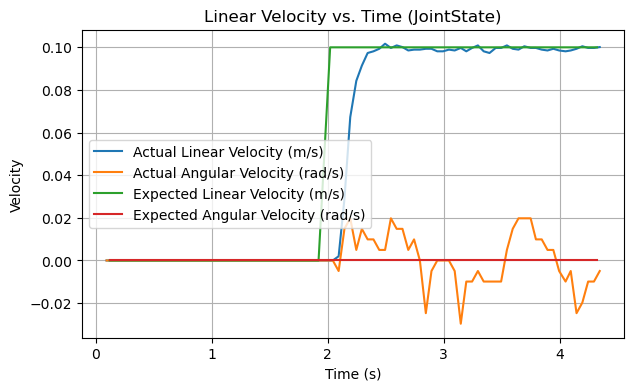

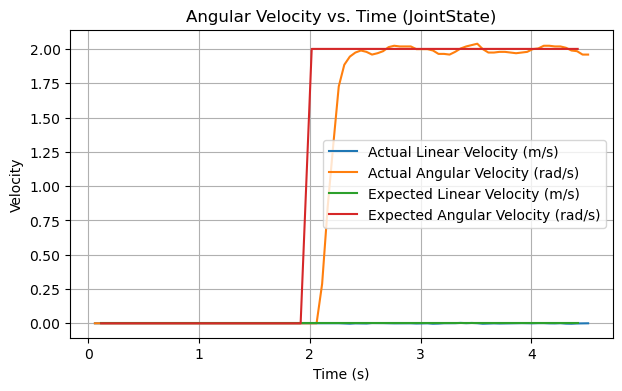

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load File 1
df1 = pd.read_csv("Linear Velocity Readings (JointState).csv")

# Plot
plt.figure(figsize=(7,4))

plt.plot(df1["Time (s)"], df1["Actual Linear Velocity (m/s)"], label="Actual Linear Velocity (m/s)")
plt.plot(df1["Time (s)"], df1["Actual Angular Velocity (rad/s)"], label="Actual Angular Velocity (rad/s)")
plt.plot(df1["Time (s)"], df1["Expected Linear Velocity (m/s)"], label="Expected Linear Velocity (m/s)")
plt.plot(df1["Time (s)"], df1["Expected Angular Velocity (rad/s)"], label="Expected Angular Velocity (rad/s)")

plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.title("Linear Velocity vs. Time (JointState)")
plt.legend()
plt.grid(True)
plt.show()

# Load File 2
df2 = pd.read_csv("Angular Velocity Readings (JointState).csv")

# Plot
plt.figure(figsize=(7,4))

plt.plot(df2["Time (s)"], df2["Actual Linear Velocity (m/s)"], label="Actual Linear Velocity (m/s)")
plt.plot(df2["Time (s)"], df2["Actual Angular Velocity (rad/s)"], label="Actual Angular Velocity (rad/s)")
plt.plot(df2["Time (s)"], df2["Expected Linear Velocity (m/s)"], label="Expected Linear Velocity (m/s)")
plt.plot(df2["Time (s)"], df2["Expected Angular Velocity (rad/s)"], label="Expected Angular Velocity (rad/s)")

plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.title("Angular Velocity vs. Time (JointState)")
plt.legend()
plt.grid(True)
plt.show()


<h5> <b> Installing Gazebo: </b> </h5>
<ul>
    <li> A tutorial was found based off of Enqi's Fall 2024 research: <a href="https://gazebosim.org/docs/fortress/install_ubuntu/ ">https://gazebosim.org/docs/fortress/install_ubuntu/</a></li>
    <li> Gazebo Fortress for Ubuntu was successfully installed.</li>
    <ul>
        <li>Currently trying to follow these instructions based to run a Turtlebot simulation: <a href="https://emanual.robotis.com/docs/en/platform/turtlebot3/simulation/">https://emanual.robotis.com/docs/en/platform/turtlebot3/simulation/</a></li>
    </ul>
        <li>Simulation failed to launch, which could be a result of the Gazebo client (GUI)</li>
    </ul>
</ul>

<h3> Date: 10/20/25 </h3>
<h4><b>Lab Overview: </b></h4>
<h5><b>Installations on Ubuntu:</b></h5>
<ul>
    <li>VS Code</li>
    <li>Jupyter Notebook</li>
    <li>Git</li>
</ul>
<p>VS and Jupyter were relatively a success </p>
<h5><b>Issues with Git:</b></h5>
<ul>
    <li>Learning basics</li>
    <li>Managing conflicts in the code</li>
</ul>

<h3> Date: 10/22/25 </h3>
<h4><b>Meeting Overview:</b></h4>
<h5><b>Goals:</b></h5>
<ul>
    <li>Get Gazebo running</li>
    <li>Run simplest turtlebot function on Gazebo</li>
    <li>Implement Gazebo simulation into physical robot</li>
    <li>Backtrack: learn fundamentals of Gazebo (using the eManual)</li>
</ul>

<h4><b>Lab Overview</b></h4>
<h5><b>Outline</b></h5>
<ul>
    <li>Switched from Git to Github Desktop for simplicity</li>
    <li>Learned the basics of Gazebo through the <a href="https://emanual.robotis.com/docs/en/platform/turtlebot3/simulation/">eManual Tutorial</a></li>
    <li>Were able to manipulate the robot in Gazebo.</li>
</ul>
<h5><b>Struggles:</b></h5>
<ul>
    <li>Properly installing Github Desktop onto Ubuntu without terminal errors</li>
    <li>Properly booting up Gazebo without terminal errors. We ended up needing to update our expired ROS key.</li>
</ul>

<h3> Date: 10/27/25 </h3>
<h4><b>Lab Overview:</b></h4>
<h5><b>Overview:</b></h5>
<ul>
    <li>Connect Turtlebot to Gazebo</li>
    <li>Run basic turtlebot functions on Gazebo</li>
</ul>
<h5><b>Progress:</b></h5>
<ul>
    <li>Turtlebot was successfully connected to Gazebo.  However, this caused the simulation itself to not run.</li>
    <li>Once disconnected, the simulation was successfully ran</li>
</ul>

<h3> Date: 10/29/25 </h3>
<h4><b>Meeting Overview:</b></h4>
<h5><b>Goals:</b></h5>
<ul>
    <li>Practice opening Gazebo Turtlebot simulations</li>
    <li>Interpret readings from each simulation</li>
    <li>Extract the most useful parts of the simulation</li>
    <li>See how to implement simulation tests into the physical Turtlebot</li>
    <li>How does teleop communicate with the simulator?</li>
</ul>
<h4><b>Lab Overview:</b></h4>
<h5><b>Outline:</b></h5>
<ul>
    <li>Added tutorial for basics of the turtlebot subscribers and publishers</li>
    <li>Both of us successfully were able to run Cartographer and Gazebo</li>
    <img src="Gazebo.png" alt="Gazebo Running" width="500">
</ul>
<h5><b>Struggles:</b></h5>
<ul>
    <li>Learning how to communicate the information from Gazebo into the actual turtlebot</li>
    <li>Learning how to program the turtlebot simualtion in Gazebo</li>
</ul>
<h5><b>Goals for next meeting:</b></h5>
<ul>
    <li>Researching videos of how to use Gazebo</li>
    <li>Meet with Enqi during the next meeting</li>
</ul>

<h3> Date: 11/3/25 </h3>
<h4><b>Lab Overview:</b></h4>
<h5><b>Outline:</b></h5>
<ul>
    <li>Successfully ran the <a href=https://drive.google.com/drive/folders/1JJHC59IyypIF9JXdzzF1K_zQiq_fo0Dv>test simulation</a> from Google drive using the <a href=https://drive.google.com/file/d/1QvO2NmUejIu2bj_4t29wrM8-eu9SRc6w/view>trained policy</a> we obtained from Enqi</li>
    <img src="Test Simulation.png" alt="Gazebo Running" width="400">
    <li>Were able to start training the simulation once we downgraded our numpy version to 1.26.4</li>
</ul>
<h5><b>Struggles:</b></h5>
<ul>
    <li>Initially unable to run the training simulation ourselves</li>
</ul>
<h5><b>Goals:</b></h5>
<ul>
    <li>Apply the trained policy to the real turtlebot</li>
</ul>

<h3> Date: 11/5/25 </h3>
<h4><b>Meeting Overview:</b></h4>
<h5><b>Goals:</b></h5>
<ul>
    <li>Find what the inputs are</li>
    <li>Find the reward policy</li>
    <li>Figure out how the simulation works. See if we can replicate the process to a simpler degree</li>
    <li>Replicate it on the turtlebot (Priority)</li>
    <li>Research <a href="https://matlabacademy.mathworks.com/details/reinforcement-learning-onramp/reinforcementlearning">reinforced learning</a></li>
</ul>
<h4><b>Lab Overview:</b></h4>
<h5><b>Outline:</b></h5>
<ul>
    <li>Started converting the code used to run the test simulation to the actual turtlebot</li>
</ul>

<h3> Date: 11/10/25 </h3>
<h4><b>Lab Overview:</b></h4>
<h5><b>Outline:</b></h5>
<ul>
    <li>Continued working on converting the <a href="test_velodyne_node.py">test_velodyne_node.py</a> to the <a href="test_turtlebot.py">test_turtlebot.py</a></li>
    <li>Researched reinforced learning with the MATLAB tutorial</li>
</ul>

<h3> Date: 11/12/25 </h3>
<h4><b>Meeting Overview:</b></h4>
<h5><b>Goals:</b></h5>
<ul>
    <li>3 Different ways to get simulation data to IRL:</li>
    <ol>
        <li>Edit the linear and angular velocity inputs (either scale it up or down)</li>
        <li>Get the irl outputs to look like what the sim outputs should look like (maybe use proportion control)</li>
        <li>Edit the Gazebo turtlebot to more accurately match the IRL turtlebot, and then train the model based on the more accurate representation</li>
    </ol>
    <li>Test the irl model accuracy by comparing the plot data from both the irl and sim navigation (make sure to start with the same scenariors for both methods)</li>
    <li>Sensor Fusion (low priority): figure out how the model uses the Gazebo data to simulate and store inputs (like odom and lidar)</li>

<h4><b>Lab Overview:</b></h4>
<ul>
    <li>The Cartagropher was successfully connected to the turtlebot.</li>
    <li>To do this, Gazebo should not be running</li>
    <li>The command export ROS_DOMAIN_ID={turtlebot ID} should be entered before launching RViz</li>
    <img src="Cartographer Teleop.png" alt= "Cartographer Running" width="400">